# Sheet 4

## Ex 1

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

a)

In [63]:
def n_grad(potential):
    # Calculate the gradient using central differences
    gradient_x = np.gradient(potential, axis=1)
    gradient_y = np.gradient(potential, axis=0)

    # Return the negative gradient components
    return -gradient_x, -gradient_y


def Gauss_Seidel(Phi, Delta, epsilon, rho, start_condions):
    J = int(1/Delta)
    L = int(1/Delta)
    #boundry conditions:
    Phi[0,:] = start_condions[0]
    Phi[J,:] = start_condions[1]
    Phi[:,0] = start_condions[2]
    Phi[:,L] = start_condions[3]
    
    index = np.arange(1,J) # index to go through the grid
    count = 0 # counter for number of iterations
    while True: # do while
        Phi_pre = Phi.copy()
        count += 1
        for j in index:
            for l in index:
                Phi[j,l] = 0.25 * (Phi[j+1,l] + Phi[j-1,l] + Phi[j,l+1] + Phi[j,l-1]) + 0.25 * Delta**2 * rho[j,l]
        if ((np.abs(Phi-Phi_pre) < epsilon).all()):
            break
    print("Iterations:", count)
    E_x , E_y = n_grad(Phi) # calc E
    return Phi , E_x , E_y
    



b)

Iterations: 336


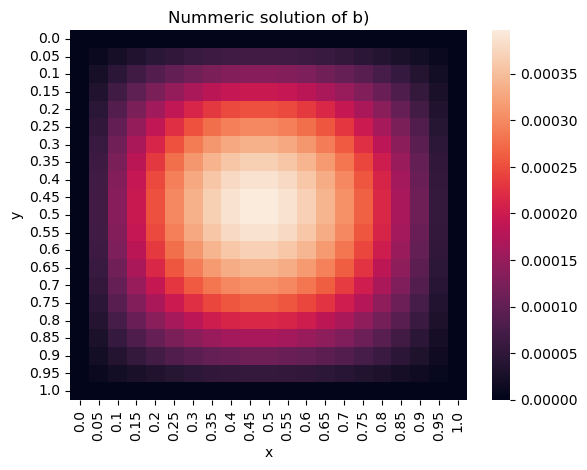

In [64]:
Delta = 0.05
epsilon = 1e-5

J = int(1/Delta)
L = int(1/Delta)
x_array = np.arange(0,1+Delta,Delta)
y_array = np.arange(0,1+Delta,Delta)

Phi_b = np.ones((J+1,J+1))
rho_b = np.zeros((J+1,J+1))
start_conditions_b = np.zeros(4)

Phi_solution_b = Gauss_Seidel(Phi_b, Delta, epsilon, rho_b, start_conditions_b)
ax = sns.heatmap(Phi_solution_b[0],xticklabels= x_array.round(2), yticklabels=y_array.round(2))
ax.set_title('Nummeric solution of b)')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

c)

Iterations: 323


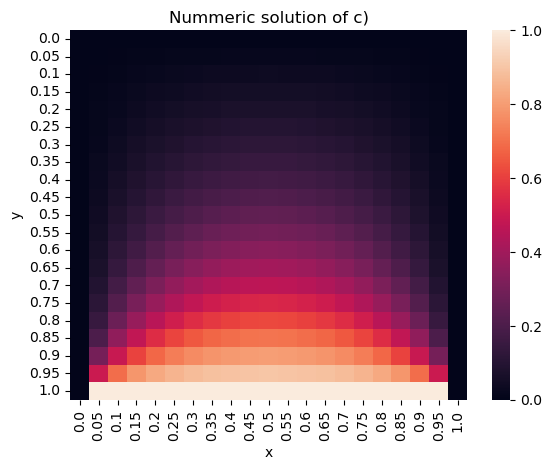

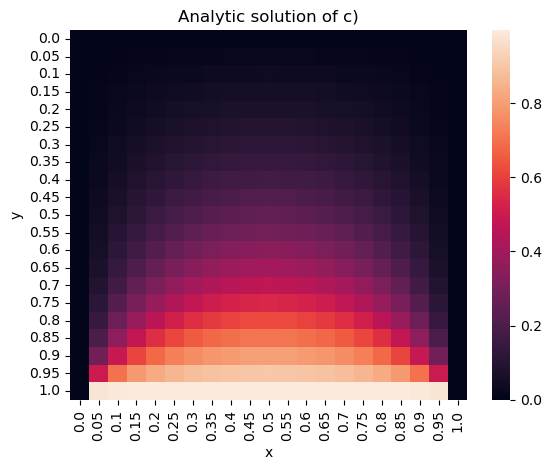

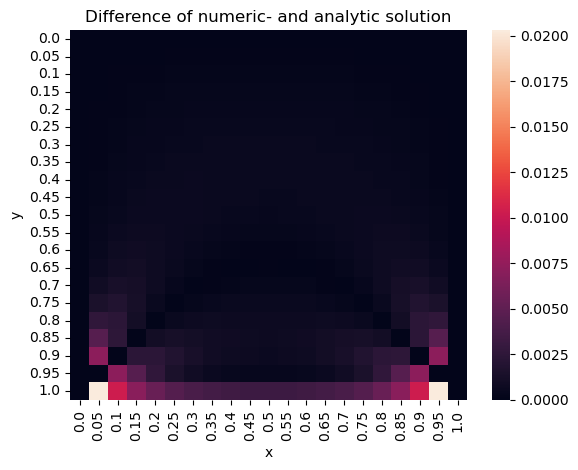

In [65]:
Phi_c = np.ones((J+1,J+1))
rho_c = np.zeros((J+1,J+1))
start_conditions_c = np.array([0,1,0,0])
Phi_solution_c = Gauss_Seidel(Phi_c, Delta, epsilon, rho_c, start_conditions_c)



### analytic solution:
def analytic_solution(x_values, y_values, n_iterations):
    x, y = np.meshgrid(x_values, y_values)
    n_index = np.arange(1, n_iterations)
    result = np.zeros_like(x)
    for n in n_index:
        result += 2 * (1-np.cos(n*np.pi)) / (n*np.pi*np.sinh(n*np.pi)) * np.sin(n*np.pi*x) * np.sinh(n*np.pi*y)
    return result

Phi_analytic = analytic_solution(x_array,y_array,200)


ax = sns.heatmap(Phi_solution_c[0],xticklabels= x_array.round(2), yticklabels=y_array.round(2))
ax.set_title('Nummeric solution of c)')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

ax = sns.heatmap(Phi_analytic,xticklabels= x_array.round(2), yticklabels=y_array.round(2))
ax.set_title('Analytic solution of c)')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

ax = sns.heatmap(np.abs(Phi_analytic-Phi_solution_c[0]),xticklabels= x_array.round(2), yticklabels=y_array.round(2))
ax.set_title('Difference of numeric- and analytic solution')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


d)

Iterations: 21


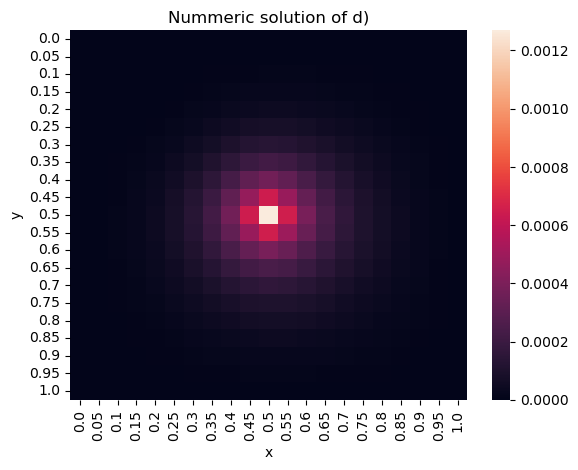

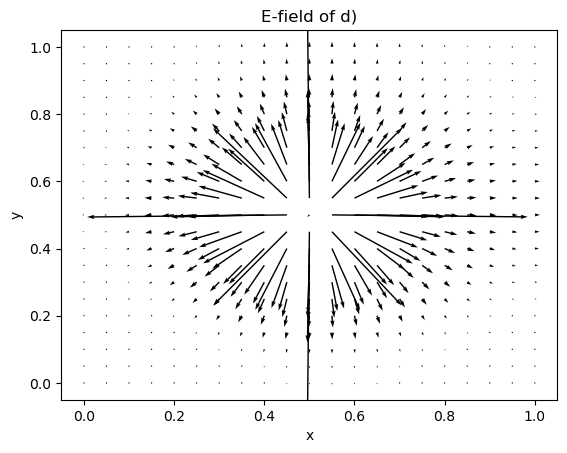

In [66]:
Phi_d = np.zeros((J+1,J+1))
rho_d = np.zeros((J+1,J+1))
rho_d[int(J/2),int(L/2)] = 1
start_conditions_d = np.zeros(4)
Phi_solution_d = Gauss_Seidel(Phi_d, Delta, epsilon, rho_d, start_conditions_d)


ax = sns.heatmap(Phi_solution_d[0],xticklabels= x_array.round(2), yticklabels=y_array.round(2))
ax.set_title('Nummeric solution of d)')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


plt.quiver(x_array, y_array, Phi_solution_d[1], Phi_solution_d[2] )
plt.title('E-field of d)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

e)

Iterations: 18


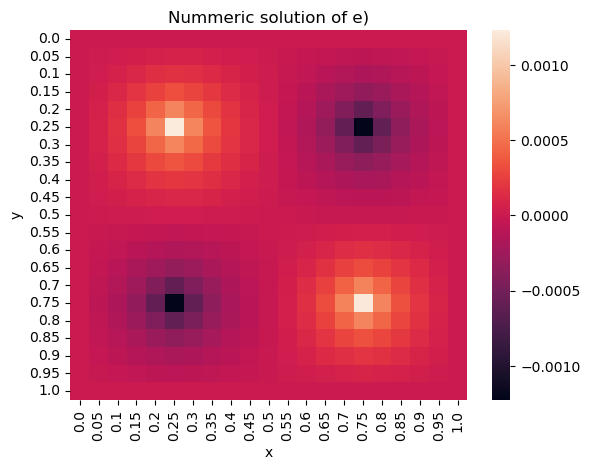

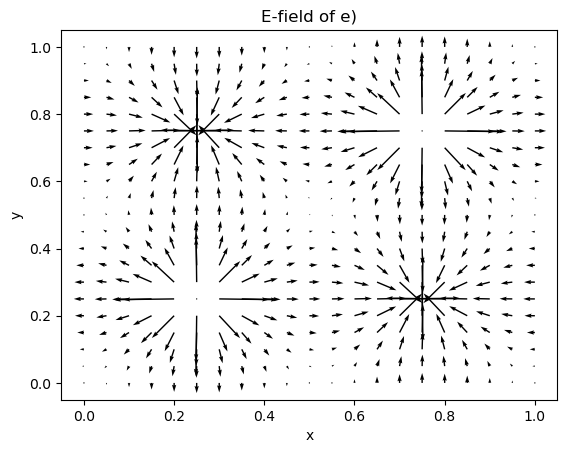

In [67]:
Phi_e = np.zeros((J+1,J+1))
rho_e = np.zeros((J+1,J+1))
rho_e[int(J/4),int(L/4)] = 1
rho_e[int(3*J/4),int(3*L/4)] = 1
rho_e[int(J/4),int(3*L/4)] = -1
rho_e[int(3*J/4),int(L/4)] = -1
start_conditions_e = np.zeros(4)
Phi_solution_e = Gauss_Seidel(Phi_e, Delta, epsilon, rho_e, start_conditions_e)


ax = sns.heatmap(Phi_solution_e[0],xticklabels= x_array.round(2), yticklabels=y_array.round(2))
ax.set_title('Nummeric solution of e)')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

plt.quiver(x_array, y_array, Phi_solution_e[1], Phi_solution_e[2] )
plt.title('E-field of e)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()